<a href="https://colab.research.google.com/github/aleshkovskijjaaa/-Gas-well-retirement-forecast-model/blob/main/pupit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 16.3 MB/s eta

In [ ]:
from darts import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Читаем csv файл с помощью pandas и удаляем
ненужные столбцы

In [ ]:
df_0 = pd.read_csv('/content/sng_dataset_v1_valid1.csv')
df_0.drop(["Unnamed: 0","MIDUPT1138P2300058", "SHORTUPT1138P2300058",
           "LONGUPT1138P2300058", 'T1013P500399'], axis= 1 , inplace= True )
df_1 = df_0.copy()
five_mins = len(df_0['DT'])
five_mins

24842

In [ ]:
df_0.head(3)

,WELL_ID,UUID,DT,UNIXDT,T1138P6000096,T1138P6000315,DMIDT1138P4000064,DSHORTT1138P4000064,DLONGT1138P4000064,DMIDT1138P2600012,...,DMIDT1205P2300000,DSHORTT1205P2300000,DLONGT1205P2300000,T1205P2300000,T1138P4000064,T1138P2600012,T1138P600050,DMIDT1138P2300058,DSHORTT1138P2300058,DLONGT1138P2300058
0,226003330,226003330028435800,2019-06-26 02:50:00,1561517400,9900,0,-1.998696,-1.175845,-1.990889,-0.229052,...,-0.000024,-0.000975,0.007884,1.141251,59,18.000000,0.706,-0.756116,-0.699951,-0.754055
1,226003330,226003330028435500,2019-06-26 02:45:00,1561517100,9600,0,-2.018884,-1.306495,-1.992882,-0.231365,...,-0.000616,-0.007600,0.007834,1.136364,59,18.000000,0.707,-0.756845,-0.701724,-0.754125
2,226003330,226003330028435200,2019-06-26 02:40:00,1561516800,9300,0,-2.039277,-1.451661,-1.994877,-0.257945,...,-0.000623,-0.008444,0.007842,1.136364,59,17.799999,0.714,-0.757581,-0.703693,-0.754195


In [ ]:
otrezok_vremeni = pd.Timedelta((five_mins-1)*5, "m")
start_date = df_0['DT'][0]
finish_date2 = pd.Timestamp(start_date)+ otrezok_vremeni
#finish_date = '2019-09-20 08:55:00' # просчитанная дата - высота столбца * 5 минут
finish_date2

Timestamp('2019-09-20 08:55:00')

In [ ]:
delta_time = pd.to_datetime(finish_date2)-pd.to_datetime(start_date)
delta_time

Timedelta('86 days 06:05:00')

Подменяем столбец дат на длинную последовательность с интервалом 5 минут

In [ ]:
stolb_dat = pd.date_range(pd.to_datetime(start_date), pd.to_datetime(finish_date2), freq='5T')
len(stolb_dat)
df_0.drop(df_0.columns[[2]], axis = 1, inplace = True)
df_0.insert (loc= 2 , column='DT', value=stolb_dat)

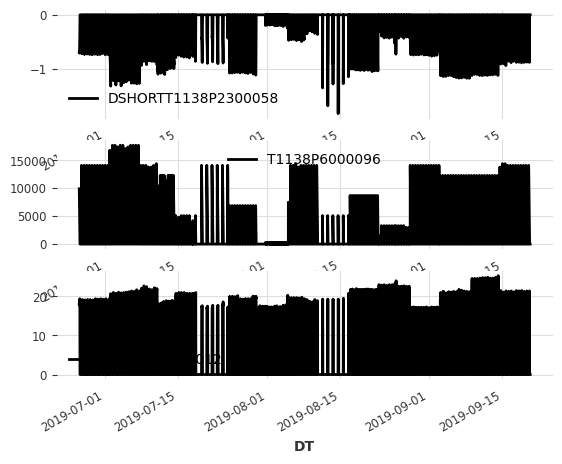

In [ ]:
TimeTOseries = TimeSeries.from_dataframe(df_0,time_col='DT' )
ts_ecg = TimeTOseries[['DSHORTT1138P2300058','T1138P6000096','T1138P2600012']]
fig, ax = plt.subplots(3, 1) # общий вид
ts_ecg['DSHORTT1138P2300058'].plot(ax=ax[0])
ts_ecg['T1138P6000096'].plot(ax=ax[1])
ts_ecg['T1138P2600012'].plot(ax=ax[2])
plt.show()

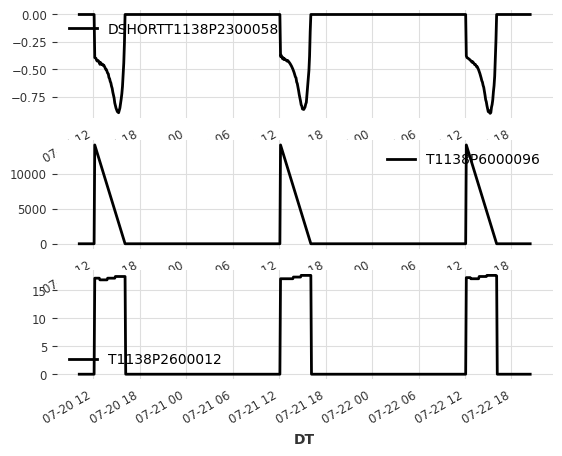

In [ ]:
fig, ax = plt.subplots(3, 1) # левый сектор аномалий
intervals = [[13965,13990],[13865,14090],[8985,9030],[7000,7700]]
r =3
start = intervals[r][0]
end = intervals[r][1]
ts_ecg['DSHORTT1138P2300058'][start:end].plot(ax=ax[0])
ts_ecg['T1138P6000096'][start:end].plot(ax=ax[1])
ts_ecg['T1138P2600012'][start:end].plot(ax=ax[2])
plt.show()

аномальная частота 7 колебаний за 1900 значений

окно примерно в 20-25 значений

In [ ]:
# попытка упростить данные для определения скважности
def stabilize (list_znazhenii):
  treshold = 0.1
  list_ = list([abs(n) for n in list_znazhenii])
  new_l = []
  max_el = max(list_)
  min_el = min(list_)
  for el in list_:
    delta = abs(el - min_el)
    if delta < max_el*treshold:
      el1 = min_el
    else:
      el1 = max_el
    new_l.append(el1)
  return new_l

In [ ]:
# определение скважности
def l_frequ_lens_here (input_list):
  porog_len = 230 # пороговое расстояние в точках между максимумами
  list_ = stabilize (input_list)
  max_el = max(list_)
  min_el = min(list_)
  wave_lens = []
  intervals_lens = []
  for i in range(1,len(list_)-2, 1):
    if list_[i] != list_[i-1] or list_[i] != list_[i+1]:
      intervals_lens.append(i)
  for i in range(len(intervals_lens)-2):
    wave_len = intervals_lens[i+1] - intervals_lens[i]
    if wave_len > porog_len:
      wave_lens.append(wave_len)

  return len(wave_lens) != 0

#проверка работы функции на аномальном участке
#l_frequ_lens_here(list_1[start:end])

In [ ]:
def here_animaly2(list_znazhenii, globalListAvg): #window 700 points
  anomal_wave_len = 270
  MAGIC_PERCENT = 0.1
  new_l = list([abs(n) for n in list_znazhenii])
  max_el = max(new_l)
  min_el = min(new_l)
  half_peak_width = 50
  half_len_sp = len(new_l)//2
  st_pk = half_len_sp - half_peak_width
  en_pk = half_len_sp + half_peak_width
  peak_avg = np.average(new_l[st_pk:en_pk])
  animaly1 = False
  animaly2 = False
  animaly3 = False
  animaly4 = False
  if peak_avg > min_el: # |......./\....
    #ищем дистанцию до пика слева
    min_dist1 = st_pk
    for i in new_l[:st_pk]:
      if i > min_el:
        min_dist1 = st_pk - i
    #ищем дистанцию до пика справа
    min_dist2 = st_pk
    for i in new_l[en_pk:]: # ..../\......|
      if i > min_el:
        min_dist2 = i - en_pk
        break
    if min_dist1 > anomal_wave_len and min_dist1 > anomal_wave_len:
      animaly1 = True
    if np.average(new_l) < MAGIC_PERCENT*max_el:
      animaly2 = True
    if np.average(new_l) < abs(globalListAvg)*0.8:
      animaly3 = True
    animaly4 = l_frequ_lens_here (new_l)


  return (animaly1 and animaly2 and animaly3 and animaly4)

In [ ]:
list_1 = df_0['DSHORTT1138P2300058'].tolist ()
list_2 = df_0['T1138P6000096'].tolist ()
list_3 = df_0['T1138P2600012'].tolist ()
list_1_avg = np.average(list_1)
list_2_avg = np.average(list_2)
list_3_avg = np.average(list_3)

print([list_1_avg, list_2_avg, list_3_avg])

def triple_anomaly (list_1, list_2, list_3):
  a1 = here_animaly2(list_1, list_1_avg)
  a2 = here_animaly2(list_2, list_2_avg)
  a3 = here_animaly2(list_3, list_3_avg)
  return a3 or a2 or a1

[-0.15393791051235312, 1561.7100072457933, 4.814177604097899]


In [ ]:
window = 700
offset = window //2 +1
list_1 = df_0['DSHORTT1138P2300058'].tolist ()
list_2 = df_0['T1138P6000096'].tolist ()
list_3 = df_0['T1138P2600012'].tolist ()

id_last_elem = len(list_1)-1 #24841
anomaly_stolb = []

for i in range(offset,id_last_elem-offset,1):
  subList1 = list_1[i-offset:i+offset]
  subList2 = list_2[i-offset:i+offset]
  subList3 = list_3[i-offset:i+offset]
  if triple_anomaly(subList1, subList2, subList3):
    curr_state = 1
  else:
    curr_state = 0
  anomaly_stolb.append(curr_state)
anomaly_stolb.count(1)

1263

In [ ]:
for i in range(offset):
  anomaly_stolb.append(0)
for i in range(offset+1):
  anomaly_stolb.insert(0,0)

df_0['ANoMALY'] = anomaly_stolb

In [ ]:
TimeTOseries1 = TimeSeries.from_dataframe(df_0,time_col='DT' )
ts_ecg = TimeTOseries1[['DSHORTT1138P2300058','T1138P6000096','T1138P2600012','ANoMALY']]

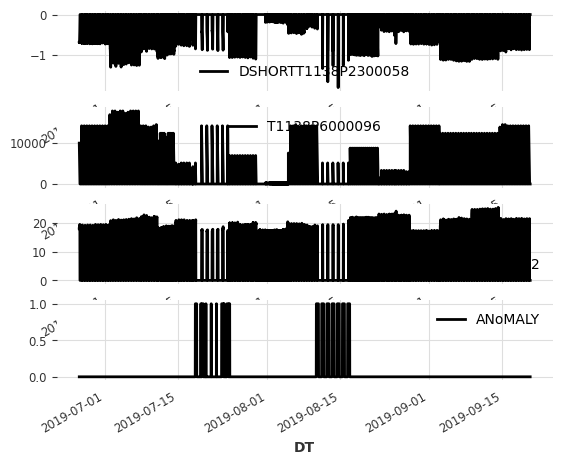

In [ ]:
fig, ax = plt.subplots(4, 1)
ts_ecg['DSHORTT1138P2300058'].plot(ax=ax[0])
ts_ecg['T1138P6000096'].plot(ax=ax[1])
ts_ecg['T1138P2600012'].plot(ax=ax[2])
ts_ecg['ANoMALY'].plot(ax=ax[3])
plt.show()

Результирующий датафрейм с столбцом аномалий

In [ ]:
df_1['anomaly'] = anomaly_stolb
df_1['DT_1'] = df_0['DT']
from google.colab import files
df_1.to_csv('output11.csv', encoding = 'utf-8-sig')
files.download('output11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_1.head(3)

,WELL_ID,UUID,DT,UNIXDT,T1138P6000096,T1138P6000315,DMIDT1138P4000064,DSHORTT1138P4000064,DLONGT1138P4000064,DMIDT1138P2600012,...,DLONGT1205P2300000,T1205P2300000,T1138P4000064,T1138P2600012,T1138P600050,DMIDT1138P2300058,DSHORTT1138P2300058,DLONGT1138P2300058,anomaly,DT_1
0,226003330,226003330028435800,2019-06-26 02:50:00,1561517400,9900,0,-1.998696,-1.175845,-1.990889,-0.229052,...,0.007884,1.141251,59,18.000000,0.706,-0.756116,-0.699951,-0.754055,0,2019-06-26 02:50:00
1,226003330,226003330028435500,2019-06-26 02:45:00,1561517100,9600,0,-2.018884,-1.306495,-1.992882,-0.231365,...,0.007834,1.136364,59,18.000000,0.707,-0.756845,-0.701724,-0.754125,0,2019-06-26 02:55:00
2,226003330,226003330028435200,2019-06-26 02:40:00,1561516800,9300,0,-2.039277,-1.451661,-1.994877,-0.257945,...,0.007842,1.136364,59,17.799999,0.714,-0.757581,-0.703693,-0.754195,0,2019-06-26 03:00:00
